# Shortest Paths

In this exercise, we will use shortest path functions. You are given a directed graph as an adjacency matrix stored in '3directedgraph.csv'. The value of an entry in the $i$-th row and $j$-th column in the matrix corresponds to the length attribute of edge $(i,j)$. Your first task is to read this file and store the graph as a Networkx DiGraph. Note that the nodes must be labelled $1$ through $20$.

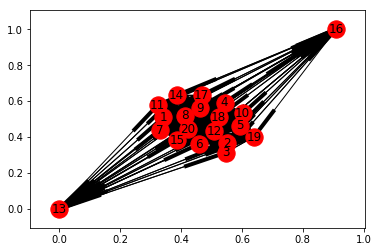

In [8]:
import numpy as np
import csv
import networkx as nx

#---------- Your code here ------------#

# 3directedgraph.csv

G = nx.DiGraph()

adj_matrix = list(csv.reader(open(('3directedgraph.csv'))))

for i in range(1,21):
    for j in range(1,21):
        if int(adj_matrix[i-1][j-1]) > 0 :
            G.add_edge(i, j, length = int(adj_matrix[i-1][j-1]))
    

import matplotlib.pyplot as plt

nx.draw_networkx(G,with_labels=True)
plt.show()

#--------------------------------------#

We will now use some of the __[shortest path algorithms](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)__ in Networkx to compute the following.

### Q1. What is the length of a shortest path from node $1$ to node $18$? Also, what is the path?

In [9]:
#---------- Your code here ------------#

# length
len1 = nx.dijkstra_path_length(G, 1, 18, weight='length')
print(len1)

# path
p1 = nx.dijkstra_path(G, 1, 18, weight='length')
print(p1)
#--------------------------------------#

5
[1, 20, 9, 18]


### Q2. What is the length of a shortest path from node $1$ to node $18$, that *does* pass through node $19$? Also, what is the path? (you can travel the same edge twice if you need to)

In [19]:
#---------- Your code here ------------#

len2 = nx.dijkstra_path_length(G, 1, 19, weight='length')

p2 = nx.dijkstra_path(G,source= 1,target= 19, weight='length')

len3 = nx.dijkstra_path_length(G, 19, 18, weight='length')

p3 = nx.dijkstra_path(G,source= 19,target= 18, weight='length')

length2 = len2 + len3 

print(length2)
print('The path goes from: ', p2, 'passing through node 19 then', p3)
#--------------------------------------#


8
The path goes from:  [1, 20, 19] passing through node 19 then [19, 18]


### Q3. What is the length of a shortest path from node $1$ to node $18$, that *does not* pass through node $9$? Also, what is the path?

In [11]:
#---------- Your code here ------------#

# from Q1 we know the original shortest path goes to node 9 through node 20, so now remove the edge to node 9
G.remove_edge(20,9)

# length
len3 = nx.dijkstra_path_length(G, 1, 18, weight='length')
print(len3)

# path
p4 = nx.dijkstra_path(G, 1, 18, weight='length')
print(p4)
#--------------------------------------#

7
[1, 20, 12, 18]


### Q4. What is the length of a shortest path from node $1$ to node $18$, that *does* pass through edge $(5,6)$? Also, what is the path?

In [13]:
#---------- Your code here ------------#

# first go to 5, then to 6, then to 18

len5 = nx.dijkstra_path_length(G, 1, 5, weight='length')

len6 = nx.dijkstra_path_length(G, 6, 18, weight='length')

p5 = nx.dijkstra_path(G, 1, 5, weight='length')

p6 = nx.dijkstra_path(G, 6, 18, weight='length')

length4 = len5 + len6 + G[5][6]['length']

# length
print(length4)

# path
print('The path goes from: ', p5, 'then', p6)
#--------------------------------------#

16
The path goes from:  [1, 20, 5] then [6, 7, 18]
